In [14]:
import math
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import cv2 as cv
import differint.differint as df

In [27]:
def grad(x):
    return df.RLpoint(7/9, x)


def norm(x, axis=0):
    return np.sqrt(np.sum(np.square(x), axis=axis))


def stopping_fun(x):
    return 1. / (1. + norm(grad(x))**2)

############
def div(x):
    dy = grad(x[0], axis = 0)
    dx = grad(x[1], axis = 1)
    return abs(dx + dy)
############

# Funciton for generatign the initial level set function phi
def initialize_phi(x, initshape ='rectangle'):
    phi = -1.0*np.ones(x.shape[:2])
    if initshape == 'rectangle':
        b = 10
        phi[b:-b, b:-b] = 1.
    else: # Circle
        r = 48
        M, N = phi.shape
        a = M/2
        b = N/2
        y,x = np.ogrid[-a:M-a, -b:N-b]
        mask = x*x + y*y <= r*r
        phi[mask] = 1.    
    return phi  

# Original image
imgo = cv.imread('C:/Users/lenovo/Desktop/two_obj.png', cv.IMREAD_GRAYSCALE)
img = imgo - np.mean(imgo)

img_smooth = cv.GaussianBlur(img,(5,5),0)

# An inverse measure of smoothed gradient as the stopping fuction
g = stopping_fun(img_smooth)#F in the blog
# Forcing the stopping function to be zero at high-gradient regions (as our V is simple here)


In [28]:
print(norm(grad(img)))

95172.38539148703


In [29]:


# Initial phi (computed usign the function phi)
phi = initialize_phi(img_smooth, 'rectangle')
print(phi)



[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


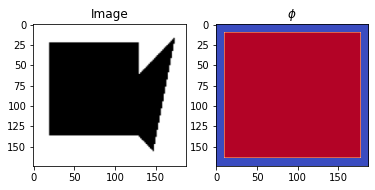

In [30]:
# Plotting the image and initial phi
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Image')
ax2 = fig1.add_subplot(122)
ax2.imshow(phi, cmap=cm.coolwarm)
ax2.title.set_text(r"$\phi$")
plt.pause(1.)

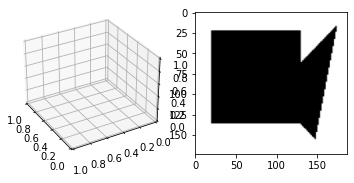

In [31]:
# Plotting the (clipped) level-set function phi and the image with level curve
fig2 = plt.figure()
ax2 = fig2.add_subplot(121, projection='3d')
ax2.view_init(elev=30., azim=-210)
M, N = phi.shape
X = np.arange(0, N, 1)
Y = np.arange(0, M, 1)
X, Y = np.meshgrid(X, Y)
ax3 = fig2.add_subplot(122)
ax3.imshow(imgo, cmap='gray')



In [32]:
# Time step
dt = 1.
# No. of iterations
n_iter = 100
for i in range(n_iter):
    
    grad_phi = grad(phi)
    grad_phi_norm = norm(grad_phi)

    phi_t =  g * grad_phi_norm

    ###########################

    #phi_t =  - grad_phi_norm - (g * grad_phi_norm)
    #phi_t = - div(np.nan_to_num(grad_phi / grad_phi_norm)) * grad_phi_norm
    #phi_t = - div(g * (np.nan_to_num(grad_phi / grad_phi_norm))) * grad_phi_norm
    #phi_t =  - g * div(np.nan_to_num(grad_phi / grad_phi_norm)) * grad_phi_norm

    ##########################
    phi = phi + dt * phi_t
    
     # Plotting the level set function phi and the zero-level curve on the image
   
    ax2.cla()
    surf = ax2.plot_surface(X, Y, np.clip(phi, -3.0, 3.0), cmap=cm.bwr,linewidth=0, antialiased=False) # I clipped phi for visualization as it grows large in negative directionplt.pause(0.000001)
    for c in ax3.collections:
        c.remove()
    ax3.contour(phi, levels=[0], colors=['red'])
    fig2.suptitle("Iterations {:d}".format(i))

In [33]:
# Plot when iterations are done
surf = ax2.plot_surface(X, Y, phi, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax3.contour(phi, levels=[0], colors=['green'])
plt.show()